In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Assuming a simple linear relationship between Age and Salary for the purpose of data generation
np.random.seed(0)
ages = np.random.randint(20, 60, size=95)
education = np.random.randint(2, 6, size=95)
salaries = 50 + (ages - 20) * 0.5 + + 0.9 * education + np.random.normal(0, 3, size=95)

# Creating a DataFrame for the additional data
df = pd.DataFrame({'Age': ages, 'Education': education, 'Salary': salaries})
df.describe()

,Age,Education,Salary
count,95.00000,95.000000,95.000000
mean,38.80000,3.568421,62.827354
std,12.65382,1.145320,7.465748
min,20.00000,2.000000,46.993827
25%,28.50000,2.000000,57.224498
50%,38.00000,4.000000,63.126227
75%,51.00000,5.000000,68.156705
max,59.00000,5.000000,79.268826


One-Sample T-Test

In [3]:
# Hypothesis testing: One-sample T-test
# Null hypothesis: Mean is 2.0
t_statistic, p_value = stats.ttest_1samp(df['Age'], 20)

print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: 14.480982055385683
p-value: 1.134543505651711e-25


Two-sample T-test

In [4]:
t_statistic, p_value = stats.ttest_ind(df['Age'], df['Salary'])  # whether significant difference between the means of two independent samples
print("T-statistic:", t_statistic)
print("p-value:", p_value)

T-statistic: -15.939883727846091
p-value: 9.47631876040635e-37


In [5]:
# Calculate Pearson correlation coefficient
correlation_coef = np.corrcoef(df['Age'], df['Salary'])
correlation_coef

array([[1.        , 0.90030601],
       [0.90030601, 1.        ]])

Linear Regression

In [6]:
# Initialize the linear regression model
X = df[['Age', 'Education']]  # Features (2D array for scikit-learn)
y = df['Salary']  # Target variable

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [7]:
# Accessing and printing the model's parameters
print("Model Coefficients (Slope):", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients (Slope): [0.52332039 1.00423433]
Model Intercept: 38.93899244388645


In [8]:
# Perform 3-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=3)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))  # larger, better

Cross-validation scores: [0.78602585 0.80850224 0.8071962 ]
Mean cross-validation score: 0.8005747655430735


Make Predictions

In [9]:
# Predictions
y_pred = model.predict(X)
y_pred

array([54.42657181, 54.99229864, 54.99229864, 72.8275982 , 56.12375229,
       64.36965914, 63.40783125, 71.25763704, 66.46294069, 54.55379114,
       65.98202674, 65.98202674, 60.70641644, 53.94565787, 74.31274647,
       74.83606686, 66.46294069, 65.98202674, 61.31454971, 72.78519176,
       66.50534713, 61.22973683, 57.60890057, 59.13645529, 64.89297953,
       61.79546366, 56.03893941, 62.2763776 , 51.41386882, 61.8378701 ,
       71.73855099, 66.98626107, 68.59862867, 62.36119048, 63.36542481,
       59.74458855, 71.82336387, 70.16858983, 53.94565787, 59.13645529,
       68.16012117, 70.64950377, 58.65554134, 66.46294069, 69.73008232,
       57.17039306, 68.07530828, 69.20676194, 53.42233748, 54.42657181,
       72.26187137, 56.03893941, 74.31274647, 60.31031538, 59.26367461,
       53.50715036, 68.64103511, 53.94565787, 51.93718921, 72.8275982 ,
       71.73855099, 74.31274647, 59.17886173, 62.84210443, 68.55622223,
       52.41810315, 58.74035422, 69.73008232, 57.69371345, 64.89

Evaluate the Model

In [10]:
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8341077841729458


In [11]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
print(f'Mean Squared Error: {mse}') # larger, worse
print(f'Mean Absolute Error: {mae}') # larger, worse

Mean Squared Error: 9.14906893999749
Mean Absolute Error: 2.5941722270634053


Visualization (Actual vs Predicted Values)

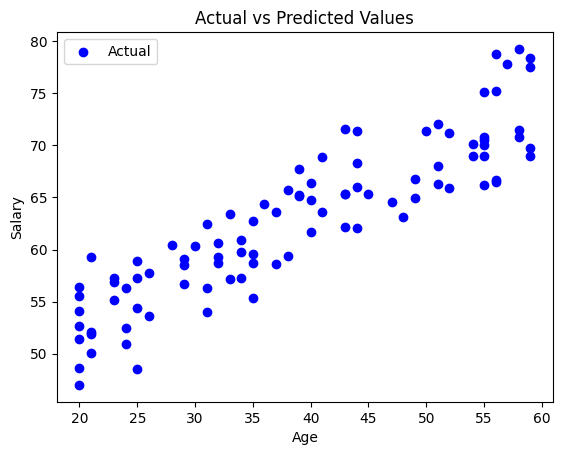

In [12]:
plt.scatter(X['Age'], y, color='blue', label='Actual')
plt.title('Actual vs Predicted Values')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

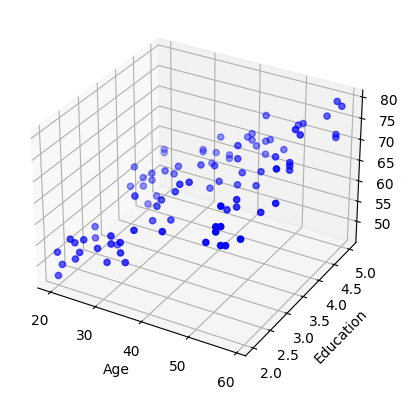

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Assuming 'Age' and 'Education' are your independent variables and 'Salary' is dependent
ax.scatter(df['Age'], df['Education'], y, color='blue', label='Actual')
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Salary')
plt.show()

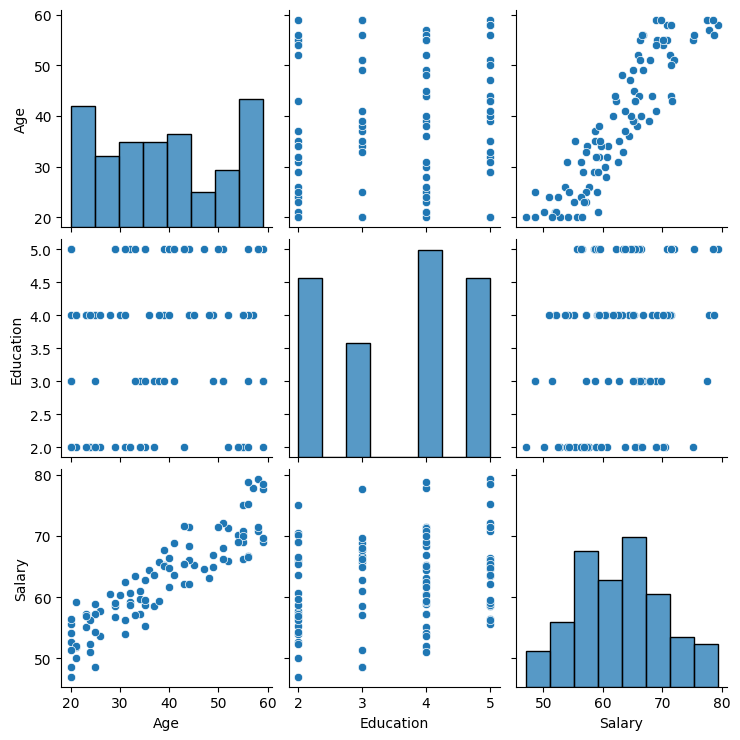

In [14]:
sns.pairplot(df[['Age', 'Education', 'Salary']])  # Include all relevant columns

Linear Regression2

In [15]:
# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     231.3
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.29e-36
Time:                        12:26:22   Log-Likelihood:                -239.95
No. Observations:                  95   AIC:                             485.9
Df Residuals:                      92   BIC:                             493.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.9390      1.366     28.497      0.000      36.225      41.653
Age            0.5233      0.025     20.810      0.000       0.473       0.573
Education      1.0042      0.278      3.614      0.000       0.452       1.556
==============================================================================
Omnibus:                        9.125   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                3.678
Skew:                           0.168   Prob(JB):                        0.159
Kurtosis:                       2.096   Cond. No.                         179.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""